In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [5]:
np.random.seed(7781)

In [16]:
mean1 = np.array([0,0,0])
cov1  = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1 = np.random.multivariate_normal(mean1,cov1,100)
class1

array([[ 0.43500137, -1.58322371,  0.87928974],
       [ 1.15623705, -1.34534735,  0.73664671],
       [-0.03346289, -0.34369407,  1.18250465],
       [ 1.13887036, -0.29782049,  0.24743958],
       [-0.33062537, -1.09303219,  0.56594815],
       [-0.5816605 ,  0.87601214,  0.32105441],
       [-0.38175796, -0.12371346, -0.48443536],
       [ 0.25892563, -2.13040184, -0.13166332],
       [ 0.45794915, -1.93663976, -0.6465179 ],
       [ 0.84984049, -3.57005071, -0.89369326],
       [ 0.2304213 , -0.64242588,  0.67639305],
       [ 2.00401646,  0.03387049, -0.42869579],
       [ 0.49488576, -0.76620903,  0.21679286],
       [-0.54648194,  1.35544665,  1.77585987],
       [-0.8885456 , -0.57115899,  0.09789888],
       [-2.14017608, -1.46443906, -2.28761618],
       [ 0.77636892, -0.38699713, -0.52535317],
       [-0.62642658,  0.32641959,  1.1521171 ],
       [ 0.55723248,  0.65227972,  0.46742909],
       [ 0.50730866, -0.83200201, -0.35013578],
       [ 2.28316097, -1.07149395,  0.500

In [10]:
mean2 = np.array([1,1,1])
cov2  = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2 = np.random.multivariate_normal(mean2,cov2,100)

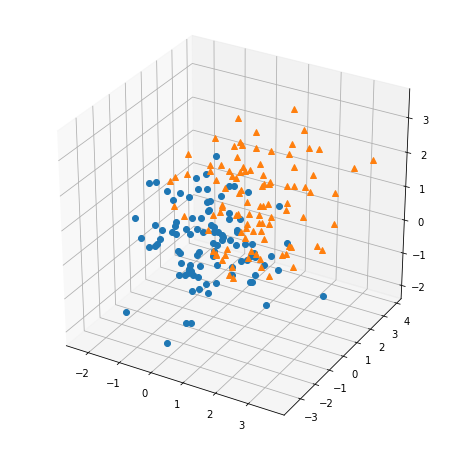

In [19]:
from mpl_toolkits.mplot3d import Axes3D,proj3d
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection = '3d')
ax.plot(class1[:,0],class1[:,1],class1[:,2],"o")
ax.plot(class2[:,0],class2[:,1],class2[:,2],"^")

In [22]:
all_data = np.concatenate((class1,class2))


In [38]:
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(all_data)
transformed_data

array([[-1.06578850e+00,  8.19935036e-01],
       [-6.32889642e-01,  1.34872477e+00],
       [-2.76908552e-01, -2.29468799e-01],
       [-1.90643414e-01,  9.03705398e-01],
       [-1.27020829e+00, -2.80262026e-02],
       [-1.75896731e-01, -1.15737811e+00],
       [-1.20419653e+00, -3.77336663e-01],
       [-2.07750726e+00,  1.08926033e+00],
       [-2.12986002e+00,  1.24704662e+00],
       [-3.19493322e+00,  2.41200294e+00],
       [-6.30636295e-01,  2.20718758e-01],
       [ 8.46732235e-02,  1.59394795e+00],
       [-8.38828131e-01,  5.79697323e-01],
       [ 9.63781462e-01, -1.58424830e+00],
       [-1.43722226e+00, -6.88294875e-01],
       [-3.95515238e+00, -9.65527230e-01],
       [-8.48446139e-01,  7.54231211e-01],
       [-1.20319337e-01, -1.05941281e+00],
       [ 2.99927094e-01, -9.05361432e-02],
       [-1.18742367e+00,  7.10107279e-01],
       [-3.05364397e-02,  2.22419617e+00],
       [-5.60947723e-01, -6.13925853e-01],
       [-1.73208550e+00, -4.33182967e-01],
       [-2.

In [29]:
#2D transformed data - unit vectors which describes our data well
pca.components_

array([[ 0.48222197,  0.68513616,  0.54593993],
       [ 0.86179071, -0.48297236, -0.15509505]])

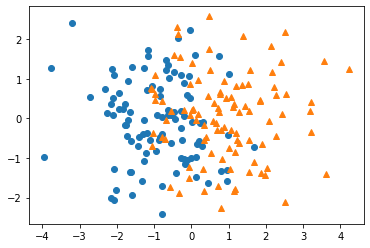

In [40]:
#2D representation of the data
plt.plot(transformed_data[0:100,0],transformed_data[0:100,1],"o")
plt.plot(transformed_data[100:200,0],transformed_data[100:200,1],"^")
plt.show()

### Applying PCA on Breast Cancer Dataset

In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
breast_cancer_dataset = load_breast_cancer()

In [3]:
data = breast_cancer_dataset.data

In [4]:
df = pd.DataFrame(data,columns=breast_cancer_dataset.feature_names)
target = breast_cancer_dataset.target

In [5]:
from sklearn.preprocessing import StandardScaler
sr = StandardScaler()
sr.fit_transform(df)

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df,target, test_size=0.33, random_state=42)
model = LogisticRegression()

In [7]:
%%time
model.fit(X_train,y_train)
print(model.score(X_test,y_test))

0.9680851063829787
CPU times: user 129 ms, sys: 8.7 ms, total: 138 ms
Wall time: 87.9 ms


In [159]:
#accuracy with PCA
pca = PCA(n_components=7)
pca_X_train = pca.fit_transform(X_train)
pca_X_test  = pca.transform(X_test)
lr = LogisticRegression()

In [160]:
%%time
lr.fit(pca_X_train,y_train)
print(lr.score(pca_X_test,y_test))

0.9574468085106383
CPU times: user 110 ms, sys: 6.97 ms, total: 117 ms
Wall time: 71.2 ms


In [162]:
print(f"Eigen Vector direction,{pca.components_}")


Eigen Vector direction,[[ 5.06050279e-03  1.98898203e-03  3.47932830e-02  5.23458410e-01
   3.66198874e-06  3.55975454e-05  7.73961028e-05  4.57239855e-05
   7.19775632e-06 -3.12872164e-06  3.21013140e-04 -4.40966563e-05
   2.25429730e-03  5.81698884e-02 -7.30100339e-07  4.24602930e-06
   7.96382032e-06  2.93191472e-06 -8.02652800e-07 -2.05830046e-07
   7.02946973e-03  2.82751163e-03  4.82333866e-02  8.47925893e-01
   5.68931058e-06  8.47305434e-05  1.55719477e-04  6.93292171e-05
   1.82828216e-05  1.06335963e-07]
 [ 8.84812140e-03 -3.41677824e-03  5.96105313e-02  8.46985237e-01
  -1.65378680e-05 -1.11174511e-05  6.80497952e-05  3.80756245e-05
  -2.00137279e-05 -1.57859846e-05  5.37779093e-05  4.26160257e-04
   1.62374105e-03  3.01422381e-02  2.52140745e-06  1.11198687e-05
   3.14741462e-05  7.56306966e-06  1.57967585e-05  2.36061160e-07
  -1.28776188e-03 -1.34694364e-02 -4.64290342e-03 -5.27120905e-01
  -8.05255434e-05 -2.80959384e-04 -2.08825209e-04 -5.24640736e-05
  -1.46918007e-04 

In [163]:
print(f"Eigen Values:{pca.explained_variance_}")

Eigen Values:[4.64358352e+05 7.83940833e+03 9.09369363e+02 5.89143297e+01
 3.72408842e+01 2.79720614e+00 1.78562684e+00]


In [8]:
#selecting the n_component
pca = PCA()
pca.fit_transform(X_train)
pca.explained_variance_

array([4.64358352e+05, 7.83940833e+03, 9.09369363e+02, 5.89143297e+01,
       3.72408842e+01, 2.79720614e+00, 1.78562684e+00, 3.87244346e-01,
       1.73561351e-01, 7.23506369e-02, 2.95910246e-02, 6.52862853e-03,
       3.21936552e-03, 2.05979930e-03, 1.34598698e-03, 6.00815794e-04,
       4.00757773e-04, 2.21814374e-04, 1.85587526e-04, 1.49992283e-04,
       7.93529399e-05, 5.87598176e-05, 3.58816874e-05, 2.52484621e-05,
       1.50444123e-05, 1.25061272e-05, 3.35116353e-06, 2.90885841e-06,
       2.01778121e-06, 6.01416940e-07])

In [11]:
total_variance = sum(pca.explained_variance_)
current_variance = 0
k = 0
while current_variance/total_variance <0.90:
    current_variance += pca.explained_variance_[k]
    print(current_variance)
    k=k+1
k

464358.35217906145


1

In [12]:
total_variance

473208.54561120825